In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
from google.colab import drive
from datetime import timedelta


drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/mq_benchamrk_result/'

data = {}

def visualize_cpu_usage():
    for root, dirs, files in os.walk(os.path.join(data_folder, 'CPU')):
      for file in files:
        if file.endswith(".csv"):
            current_provider = root.split('/')[-1]
            current_load_size = root.split('/')[-2].split("_")[0]

            df = pd.read_csv(os.path.join(root, file), usecols=[0, 1], skiprows=[0])
            df = df.rename(columns={df.columns[0]: "datetime", df.columns[1]: "value"})

            df['datetime'] = pd.to_datetime(df['datetime'])
            df['datetime'] = pd.to_datetime("2023-07-08 02:00:00")

            time_diff = timedelta(seconds = 10)
            df['datetime'] = df['datetime'] + df.index * time_diff
            df['datetime'] = (df['datetime'].dt.minute * 60) + df['datetime'].dt.second

            temp = df.iloc[:181,]
            if current_load_size not in data:
                data[current_load_size] = {}
            if current_provider not in data[current_load_size]:
                data[current_load_size][current_provider] = temp

visualize_cpu_usage()

# print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
rocketmq_data = {
    'datetime': list(range(0, 1810, 10)),
    'value': [0] * 181
}

# Add RocketMQ data to the dictionary for each load size
data['100kb']['rocketmq'] = pd.DataFrame(rocketmq_data)
data['1000kb']['rocketmq'] = pd.DataFrame(rocketmq_data)
data['10kb']['rocketmq'] = pd.DataFrame(rocketmq_data)


In [21]:
%cd /content/drive/MyDrive/
!pwd
!mkdir jvm_based_cpu_usage
%cd jvm_based_cpu_usage
!pwd
!pip3 install -U kaleido

/content/drive/MyDrive
/content/drive/MyDrive
/content/drive/MyDrive/jvm_based_cpu_usage
/content/drive/MyDrive/jvm_based_cpu_usage


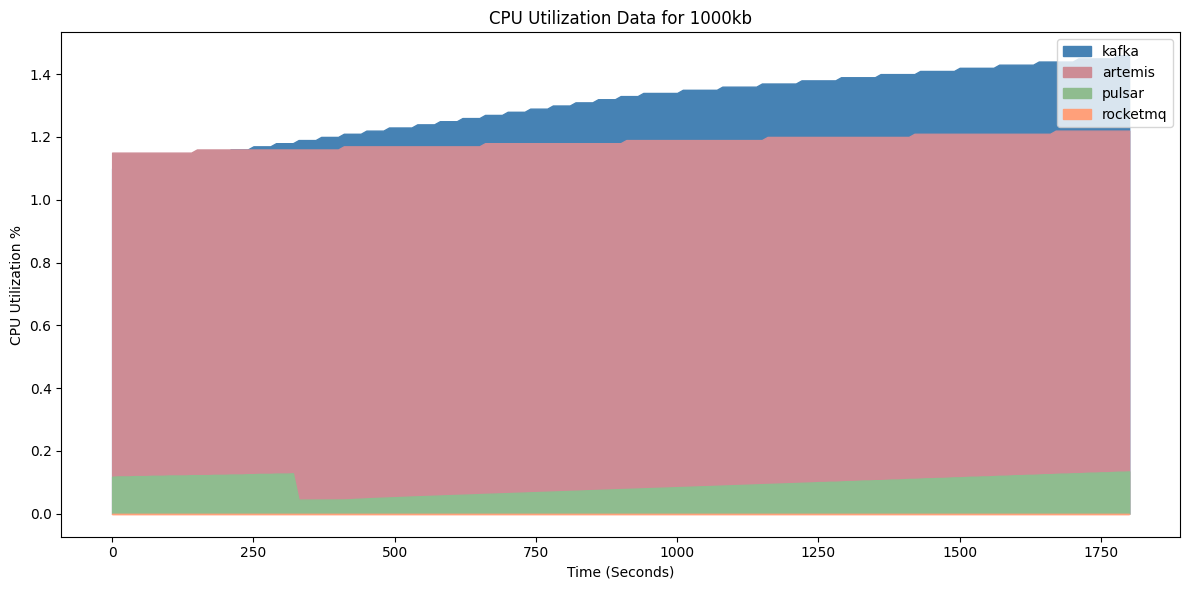

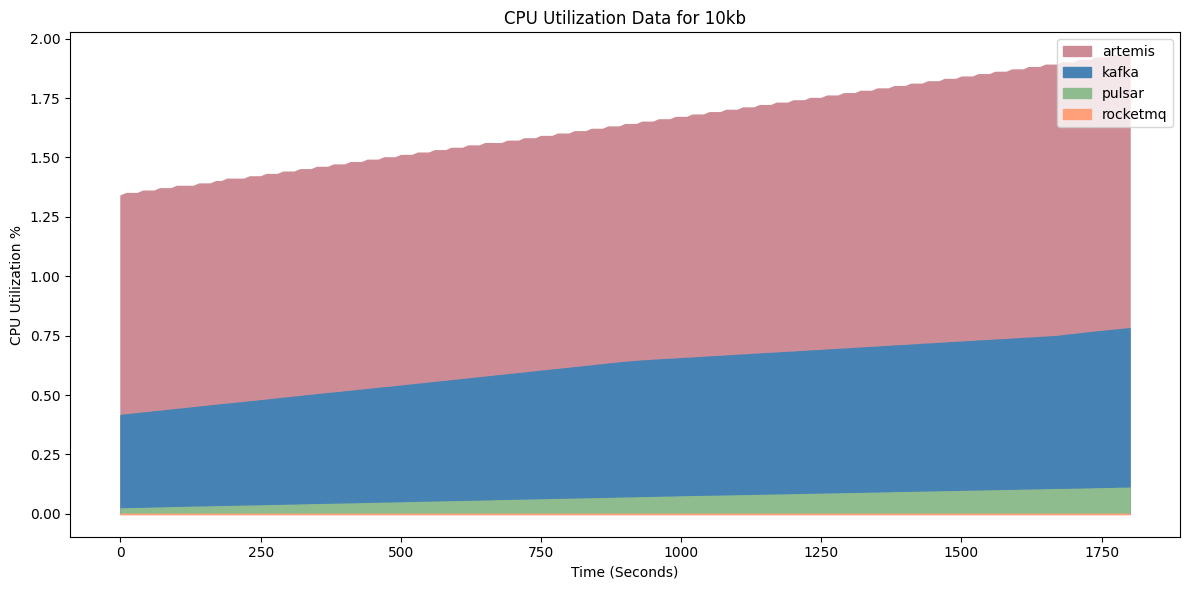

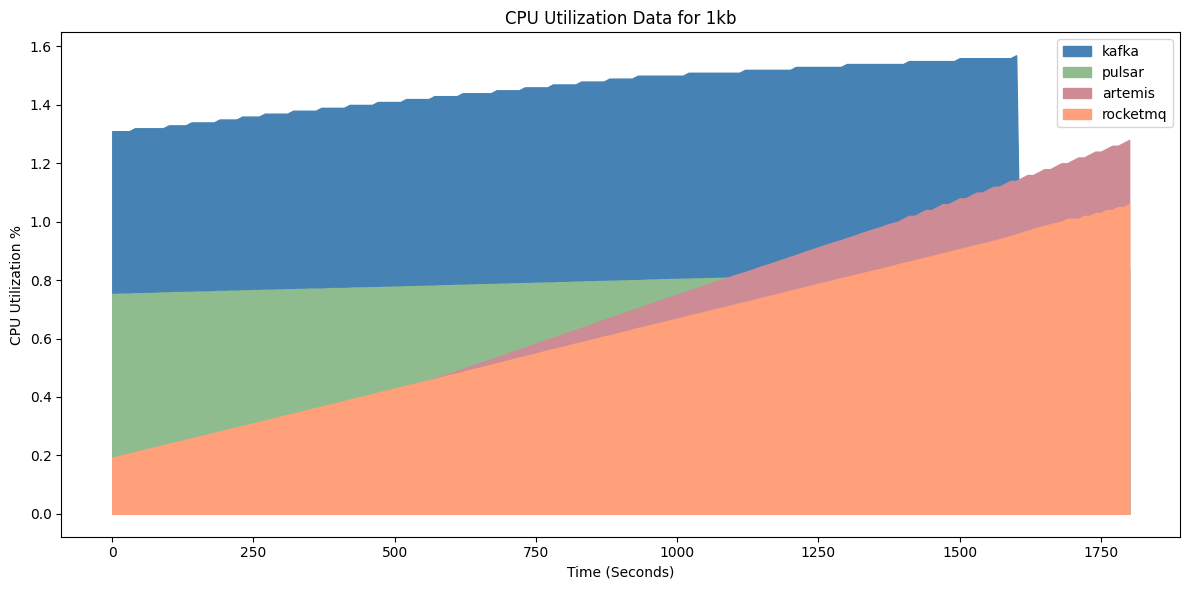

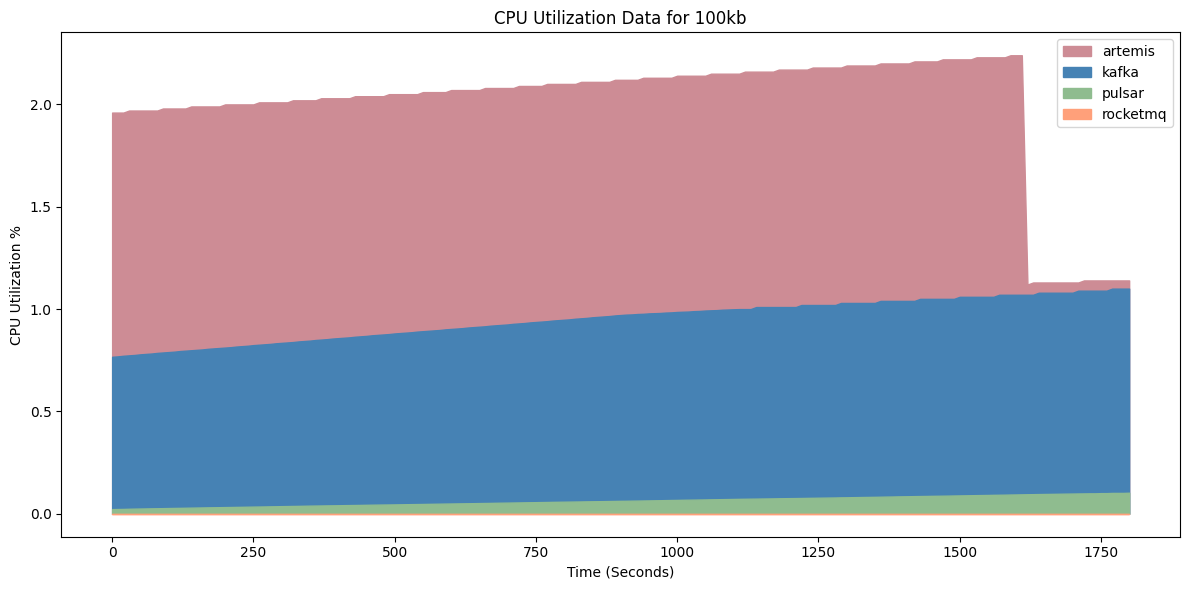

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# colors = {
#     'artemis': '#4682B4',  # Steel Blue
#     'kafka': '#CD8C95',    # Dusty Rose
#     'pulsar': 'darkseagreen',   # Cadet Blue
#     'rocketmq': '#FFA07A'  # Dark Orange
# }

colors = {
    'artemis': '#CD8C95',  # Gold
    'kafka': '#4682B4',    # Lime Green
    'pulsar': 'darkseagreen',   # Royal Blue
    'rocketmq': '#FFA07A'  # Light Salmon
}

# Assuming you already have the 'data' dictionary containing your data
for load_size, providers in data.items():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(f'CPU Utilization Data for {load_size}')
    ax.set_xlabel('Time (Seconds)')
    ax.set_ylabel('CPU Utilization %')

    sorted_providers = sorted(providers.items(), key=lambda x: x[1]['value'].sum(), reverse=True)

    for provider, df in sorted_providers:
        ax.fill_between(df['datetime'], 0, df['value'], label=provider, color=colors.get(provider, 'gray'))

    ax.legend()
    plt.tight_layout()
    plt.savefig(f'{load_size}_cpu_utilization.pdf', dpi=300)
    plt.show()


In [23]:
# import plotly.express as px
# import pandas as pd

# for load_size, providers in data.items():
#     load_sizes = []
#     provider_names = []
#     datetime = []
#     values = []

#     for provider, df in providers.items():
#         if provider == "rocketmq":
#           continue
#         provider_names.extend([provider] * len(df))
#         datetime.extend(df['datetime'])
#         values.extend(df['value'])
#         load_sizes.extend([load_size] * len(df))

#     plotly_data = pd.DataFrame({'Load Size': load_sizes, 'Provider': provider_names, 'Datetime': datetime, 'Value': values})

#     fig = px.area(plotly_data, x="Datetime", y="Value", color="Provider", line_group="Provider",
#                   # title=f'Wave-like Time Series Data for {load_size}',
#                   labels={"Datetime": "Time(Seconds)", "Value": "CPU Usage", "Provider": "Provider"},
#                   template="plotly", width=1000, height=700)

#     fig.update_layout(
#         title={
#             'text': f'CPU Usage Data for {load_size}',
#             'x': 0.5,
#             'xanchor': 'center',
#             'y': 0.95,
#             'yanchor': 'top'
#         }
#     )

#     fig.write_image(load_size + "cpu_usage" + '.pdf')

#     fig.show()


In [24]:
# !pip install dash

In [25]:
# data["100kb"]["artemis"]

In [26]:
# import plotly.graph_objects as go
# import pandas as pd

# load_size = '100kb'

# fig = go.Figure()

# # Loop through each provider's data for the specified load size
# for provider, df in data[load_size].items():
#     # Add a trace for each provider's data
#     fig.add_trace(go.Scatter(
#         x=df['datetime'], y=df['value'],
#         mode='lines', stackgroup=load_size,
#         name=f'{load_size} - {provider}'
#     ))

# # Customize the layout
# fig.update_layout(
#     title=f'Wave-like Time Series Data for {load_size}',
#     xaxis_title='Time',
#     yaxis_title='Value',
#     showlegend=True,
#     yaxis_range=(0, 4.5)  # Adjust the y-axis range if needed
# )

# fig.show()
